# SWOT



<Axes: >

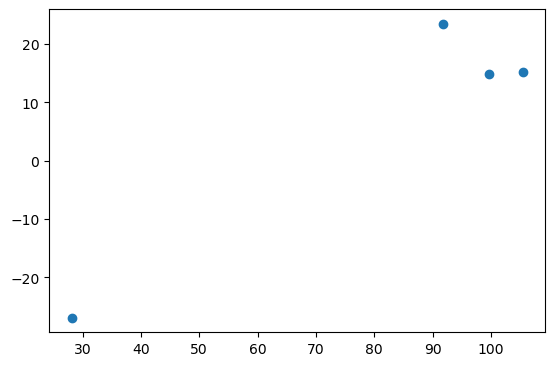

In [4]:
import geopandas as gpd
from pathlib import Path

# read the} bounding box of the study area
val_pts = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand-pts.geojson'))
val_polys = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand.geojson'))

selected_reservoirs = [
    '0505', # dumboor. India
    '0810', # sirindhorn, Thailand.
    '0830', # Krasoew, Thailand.
    # '0502', # Bhakra dam, India.
    # '0518', # Bhadra, India.
    '0349', # vaaldam, South Africa.
    # '0464', # Sterkspruit, South Africa.
    # '0214', # Cijara, Spain
    # '1498', # Toledo bend, US
    # '0936', # Arrow, Canada
]

val_res_pt = val_pts.loc[val_pts['tmsos_id'].isin(selected_reservoirs)]
val_res_poly = val_polys.loc[val_polys['tmsos_id'].isin(selected_reservoirs)]

val_res_pt.plot()

In [5]:
import pandas as pd

start_date = '2022-09-30'
end_date = '2024-03-30'
reservoir_id = '0830'

val_res_poly.loc[val_res_poly['tmsos_id']==reservoir_id]

buffer_amt = 0.05
buffered_roi = val_res_poly.loc[val_res_poly['tmsos_id']==reservoir_id].copy()
buffered_roi['geometry'] = buffered_roi.buffer(buffer_amt)
bounds = ",".join([f"{x:.3f}" for x in buffered_roi.total_bounds])
print(bounds)

podaac_cmd = [
    'podaac-data-downloader',
    '-c', 'SWOT_L2_HR_Raster_100m_2.0',
    '-d', '../data/swot/raw', '-b', bounds,
    '--start-date', pd.to_datetime(start_date).strftime('%Y-%m-%dT%XZ'),
    '--end-date', pd.to_datetime(end_date).strftime('%Y-%m-%dT%XZ'),
]

import subprocess

subprocess.run(podaac_cmd)

99.555,14.777,99.722,14.974


/tmp/ipykernel_239331/732770678.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_roi['geometry'] = buffered_roi.buffer(buffer_amt)


[2024-04-30 11:25:50,823] {podaac_data_downloader.py:317} INFO - Found 12 total files to download
[2024-04-30 11:25:51,036] {podaac_data_downloader.py:350} INFO - 2024-04-30 11:25:51.036531 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM47P_N_x_x_x_012_452_065F_20240322T205338_20240322T205359_PIC0_01.nc
[2024-04-30 11:25:51,175] {podaac_data_downloader.py:350} INFO - 2024-04-30 11:25:51.175884 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM47P_N_x_x_x_012_452_064F_20240322T205318_20240322T205339_PIC0_01.nc
[2024-04-30 11:25:51,337] {podaac_data_downloader.py:350} INFO - 2024-04-30 11:25:51.337809 SKIPPED: https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM47P_N_x_x_x_012_355_091F_20240319T095200_20240319T095221_PIC0_01.nc
[2024-04

CompletedProcess(args=['podaac-data-downloader', '-c', 'SWOT_L2_HR_Raster_100m_2.0', '-d', '../data/swot/raw', '-b', '99.555,14.777,99.722,14.974', '--start-date', '2022-09-30T00:00:00Z', '--end-date', '2024-03-30T00:00:00Z'], returncode=0)

## SWOT - determine pass number

In [6]:
gd_track_fn = Path('../data/swot_orbit/swot_orbit.geojson')
gd_track = gpd.read_file(gd_track_fn)
gd_track

,ID_PASS,START_TIME,geometry
0,1,Day 01 00:00:00,"MULTIPOLYGON (((-75.45870 -77.45455, -75.73434..."
1,2,Day 01 00:51:30,"MULTIPOLYGON (((84.56768 77.75119, 84.60080 78..."
2,2,Day 01 00:51:30,"MULTIPOLYGON (((-180.00000 -52.37417, -180.000..."
3,3,Day 01 01:42:50,"MULTIPOLYGON (((-110.19573 -77.57156, -110.161..."
4,4,Day 01 02:34:20,"MULTIPOLYGON (((57.70091 77.75254, 57.69643 78..."
...,...,...,...
845,582,Day 21 18:10:40,"MULTIPOLYGON (((136.37126 77.75111, 136.40526 ..."
846,582,Day 21 18:10:40,"MULTIPOLYGON (((-180.00000 72.80747, -180.0000..."
847,583,Day 21 19:02:00,"MULTIPOLYGON (((-58.39258 -77.57164, -58.35950..."
848,584,Day 21 19:53:30,"MULTIPOLYGON (((109.50449 77.75255, 109.50090 ..."


<Axes: >

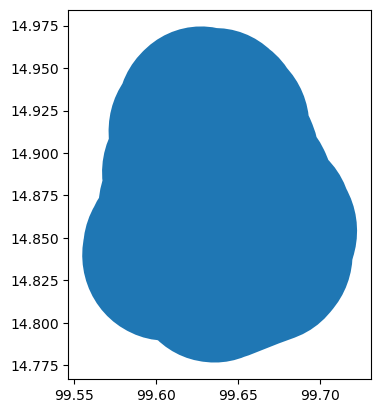

In [7]:
buffered_roi.plot()

In [8]:
buffered_roi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
gd_track.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

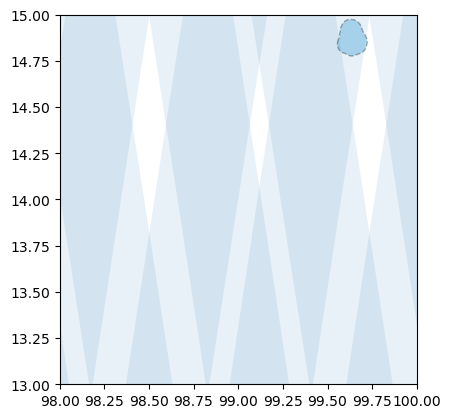

In [10]:
ax = gd_track.plot(alpha=0.1)
ax.set_xlim(int(buffered_roi.total_bounds[0])-1, int(buffered_roi.total_bounds[2])+1)
ax.set_ylim(int(buffered_roi.total_bounds[1])-1, int(buffered_roi.total_bounds[3])+1)

buffered_roi.plot(ax=ax, color='#0e87cc', alpha=0.3, linestyle='dashed', edgecolor='black')

In [11]:
matches = gd_track[gd_track.intersects(buffered_roi.iloc[0].geometry)]
matches

,ID_PASS,START_TIME,geometry
514,355,Day 13 15:32:10,"MULTIPOLYGON (((13.83542 -77.57321, 13.84300 -..."
655,452,Day 17 02:42:30,"MULTIPOLYGON (((17.98744 77.75230, 17.97290 78..."


In [12]:
pass_ids = list(matches.ID_PASS)
pass_ids

[355, 452]

In [13]:
import pandas as pd
from shapely.geometry import mapping
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info
from pyproj import CRS
import xarray as xr
from rioxarray.exceptions import NoDataInBounds

def get_swot_id(
        id, 
        start_date="2022-07-01", 
        end_date="2022-07-31", 
        buffer=0.05,
        qual_mask_threshold=0.7
    ):
    roi = val_res_poly.loc[val_res_poly['tmsos_id']==id]
    buffered_roi = roi.geometry.iloc[0].convex_hull.buffer(buffer)
    roi.geometry = [buffered_roi]
    swot_dir = Path(f'../data/swot/raw')

    # determine swot pass number
    gd_track_fn = Path('../data/swot_orbit/swot_orbit.geojson')
    gd_track = gpd.read_file(gd_track_fn)

    matches = gd_track[gd_track.intersects(roi.iloc[0].geometry)]
    pass_ids = list(matches.ID_PASS)
    
    fns = []
    for pass_id in pass_ids:
        files = swot_dir.glob(f'*_{pass_id:03}_*')
        fns.extend(files)

    fn_dates = [fn.name.split('_')[13] for fn in fns]

    datas = []

    for fn, fn_date in zip(fns, fn_dates):
        fn_date = pd.to_datetime(fn_date)
        if fn_date < pd.to_datetime(start_date) or fn_date > pd.to_datetime(end_date):
            continue
        # data = xr.open_dataset(fn, engine='rasterio').sel(band=1)
        data = xr.open_dataset(fn, decode_coords="all")
        date = pd.to_datetime(fn.name.split('_')[13])

        data = data.assign_coords(
            reservoir=((id)),
            time=((pd.to_datetime(date.date())))
        )
        # print(data.spatial_ref.values)
        utm_crs_list = query_utm_crs_info(
            datum_name="WGS 84",
            area_of_interest=AreaOfInterest(
                west_lon_degree=data.attrs['geospatial_lon_min'],
                south_lat_degree=data.attrs['geospatial_lat_max'],
                east_lon_degree=data.attrs['geospatial_lon_max'],
                north_lat_degree=data.attrs['geospatial_lat_max'],
            ),
        )
        projection = utm_crs_list[0]
        roi = roi.to_crs(projection.code)
        data = data.rio.write_crs(projection.code)
        try:
            data = data[[
                'water_area', 'water_area_qual', 
                'water_frac', 'water_frac_uncert', 
                'wse', 'wse_uncert'
            ]].rio.clip(roi.geometry.values, crs=projection.code, drop=True)
            mask = data['water_area_qual'] < qual_mask_threshold
            data['water_area_masked'] = data['water_area'].where(mask)
            datas.append(data)
        except NoDataInBounds as e:
            pass

    data = xr.concat(datas, dim='time')
    
    data = data.groupby('time').mean(dim='time')

    data = data.chunk(chunks={
        'time': 30,
        'x': 4096,
        'y': 4096
    })

    return data


swot_ds = get_swot_id(
    # reservoir_id, '2024-01-01', '2024-03-30',
    '0505', '2024-01-01', '2024-03-30',
    qual_mask_threshold=1)
swot_ds

/tiger1/pdas47/tmsosPP/.env/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<xarray.Dataset> Size: 8MB
Dimensions:            (x: 193, y: 232, time: 6)
Coordinates:
  * x                  (x) float64 2kB 3.733e+05 3.734e+05 ... 3.925e+05
  * y                  (y) float64 2kB 2.587e+06 2.587e+06 ... 2.61e+06 2.61e+06
    reservoir          <U4 16B '0505'
    spatial_ref        int64 8B 0
    crs                int64 8B 0
  * time               (time) datetime64[ns] 48B 2024-02-02 ... 2024-03-23
Data variables:
    water_area         (time, y, x) float32 1MB dask.array<chunksize=(6, 232, 193), meta=np.ndarray>
    water_area_qual    (time, y, x) float32 1MB dask.array<chunksize=(6, 232, 193), meta=np.ndarray>
    water_frac         (time, y, x) float32 1MB dask.array<chunksize=(6, 232, 193), meta=np.ndarray>
    water_frac_uncert  (time, y, x) float32 1MB dask.array<chunksize=(6, 232, 193), meta=np.ndarray>
    wse                (time, y, x) float32 1MB dask.array<chunksize=(6, 232, 193), meta=np.ndarray>
    wse_uncert         (time, y, x) float32 1MB dask.array<chunksize=(6, 232, 193), meta=np.ndarray>
    water_area_masked  (time, y, x) float32 1MB dask.array<chunksize=(6, 232, 193), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                   CF-1.7
    title:                         Level 2 KaRIn High Rate Raster Data Product
    source:                        Ka-band radar interferometer
    history:                       2024-02-06T13:18:22Z : Creation
    platform:                      SWOT
    references:                    V1.2.1
    ...                            ...
    x_min:                         325700.0
    x_max:                         472900.0
    y_min:                         2518700.0
    y_max:                         2665800.0
    institution:                   CNES
    product_version:               01

In [14]:
# savefp = Path(f'../data/swot/{reservoir_id}.zarr')
# swot_ds.to_zarr(savefp, mode='a', consolidated=True, compute=True)


In [15]:
# ds = xr.open_zarr(savefp)
# ds

# Plot

In [16]:
import holoviews as hv
import hvplot.xarray

ds = swot_ds

ds['wse'].hvplot(
    x='x', y='y', rasterize=True, aspect='equal', clim=(80, 100) # , geo=True, # crs=ds.rio.crs
).opts(
    title='Water Surface Elevation (m)'
) + ds['wse_uncert'].hvplot(
    x='x', y='y', rasterize=True, clim=(0, 1), aspect='equal', cmap='RdYlBu_r' #  geo=True, crs=ds.rio.crs
).opts(
    title='Water Surface Elevation Uncertainty (m)'
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'4e44f37f-c7bc-48c5-b064-5bb150a215a5': {'version…

In [17]:
import holoviews as hv

swot_ds['water_frac'].hvplot(
    x='x', y='y', rasterize=True, aspect='equal', clim=(0, 1) # , geo=True, # crs=swot_ds.rio.crs
).opts(
    title='Water Fraction'
) + swot_ds['water_frac_uncert'].hvplot(
    x='x', y='y', rasterize=True, clim=(0, 1), aspect='equal', cmap='RdYlBu_r' #  geo=True, crs=swot_ds.rio.crs
).opts(
    title='Water Fraction Uncertainty'
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'c0ad8d5a-72cf-4922-ac09-d9473b31384e': {'version…

In [18]:
import holoviews as hv

swot_ds['water_area'].hvplot(
    x='x', y='y', rasterize=True, aspect='equal', clim=(0, 1e4) # , geo=True, # crs=swot_ds.rio.crs
).opts(
    title='Water Area'
) + swot_ds['water_area_qual'].hvplot(
    x='x', y='y', rasterize=True, clim=(0, 3), aspect='equal', cmap='RdYlBu_r' #  geo=True, crs=swot_ds.rio.crs
).opts(
    title='Water Area Quality (0=nominal,1=suspect,2=degraded,3=bad)'
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'d6b42e79-8c8c-4350-b244-5ce8af3cfbe5': {'version…

In [ ]:
swot_ds.to_zarr()

In [257]:
gd_track[gd_track.intersects(buffered_roi)]

/tmp/ipykernel_173210/2031697496.py:1: UserWarning: The indices of the two GeoSeries are different.
  gd_track[gd_track.intersects(buffered_roi)]


,ID_PASS,START_TIME,geometry


In [241]:
import xarray as xr

fn = fns[0]

ds = xr.open_dataset(fn, engine='rasterio').sel(band=1)
ds

<xarray.Dataset> Size: 422MB
Dimensions:                  (x: 1467, y: 1466)
Coordinates:
    band                     int64 8B 1
  * x                        (x) float64 12kB 5.254e+05 5.255e+05 ... 6.72e+05
  * y                        (y) float64 12kB 1.655e+06 1.655e+06 ... 1.509e+06
    crs                      int64 8B ...
    spatial_ref              int64 8B ...
Data variables: (12/38)
    longitude                (y, x) float64 17MB ...
    water_area_uncert        (y, x) float32 9MB ...
    water_frac               (y, x) float32 9MB ...
    water_frac_uncert        (y, x) float32 9MB ...
    sig0                     (y, x) float32 9MB ...
    sig0_qual                (y, x) float32 9MB ...
    ...                       ...
    wse_qual                 (y, x) float32 9MB ...
    wse_qual_bitwise         (y, x) float64 17MB ...
    wse_uncert               (y, x) float32 9MB ...
    water_area               (y, x) float32 9MB ...
    water_area_qual          (y, x) float32 9MB ...
    water_area_qual_bitwise  (y, x) float64 17MB ...
Attributes: (12/49)
    contact:                       podaac@podaac.jpl.nasa.gov
    Conventions:                   CF-1.7
    coordinate_reference_system:   Universal Transverse Mercator
    crid:                          PIC0
    cycle_number:                  12
    descriptor_string:             100m_UTM48P_N_x_x_x
    ...                            ...
    xref_param_l2_hr_raster_file:  SWOT_Param_L2_HR_Raster_20000101T000000_21...
    xref_reforbittrack_files:      SWOT_RefOrbitTrackTileBoundary_Nom_2000010...
    x_max:                         672000
    x_min:                         525400
    y_max:                         1655200
    y_min:                         1508700

In [242]:
ds.crs.attrs['crs_wkt']

'PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]'

<Axes: >

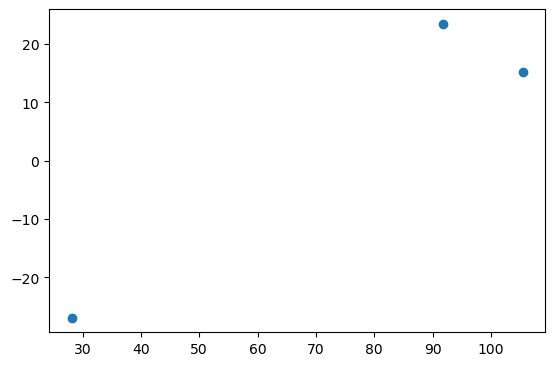

In [243]:
import geopandas as gpd
from pathlib import Path

# read the bounding box of the study area
val_pts = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand-pts.geojson'))
val_polys = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand.geojson'))

selected_reservoirs = [
    '0505', # dumboor. India
    '0810', # sirindhorn, Thailand.
    # '0830', # Krasoew, Thailand.
    # '0502', # Bhakra dam, India.
    # '0518', # Bhadra, India.
    '0349', # vaaldam, South Africa.
    # '0464', # Sterkspruit, South Africa.
    # '0214', # Cijara, Spain
    # '1498', # Toledo bend, US
    # '0936', # Arrow, Canada
]

val_res_pt = val_pts.loc[val_pts['tmsos_id'].isin(selected_reservoirs)]
val_res_poly = val_polys.loc[val_polys['tmsos_id'].isin(selected_reservoirs)]

val_res_pt.plot()

In [212]:
import pandas as pd
from shapely.geometry import mapping
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info
from pyproj import CRS


def get_swot_id(
        id, 
        start_date="2022-07-01", 
        end_date="2022-07-31", 
        buffer=0.05,
        qual_mask_threshold=0.7
    ):
    roi = val_res_poly.loc[val_res_poly['tmsos_id']==id]
    buffered_roi = roi.geometry.iloc[0].convex_hull.buffer(buffer)
    roi.geometry = [buffered_roi]
    swot_dir = Path(f'../data/swot')
    fns = list(swot_dir.glob('*_090_*.nc'))
    # fn_dates = [fn.name.split('_')[13] for fn in fns]
    
    datas = []
    for fn in fns:
        data = xr.open_dataset(fn, engine='rasterio').sel(band=1)
        date = pd.to_datetime(fn.name.split('_')[13])

        data = data.assign_coords(
            reservoir=((id)),
            time=((pd.to_datetime(date.date())))
        )
        datas.append(data)
    data = xr.concat(datas, dim='time')
    
    data = data.groupby('time').mean(dim='time')

    utm_crs_list = query_utm_crs_info(
        datum_name="WGS 84",
        area_of_interest=AreaOfInterest(
            west_lon_degree=data.attrs['geospatial_lon_min'],
            south_lat_degree=data.attrs['geospatial_lat_max'],
            east_lon_degree=data.attrs['geospatial_lon_max'],
            north_lat_degree=data.attrs['geospatial_lat_max'],
        ),
    )
    roi = val_res_poly.loc[val_res_poly['tmsos_id']=='0810']
    buffered_roi = roi.geometry.iloc[0].convex_hull.buffer(buffer)
    roi.geometry = [buffered_roi]

    projection = utm_crs_list[0]
    roi = roi.to_crs(projection.code)
    data = data.rio.write_crs(projection.code)
    data = data.rio.clip(roi.geometry.values, crs=projection.code, drop=True)

    mask = data['water_area_qual'] < qual_mask_threshold
    data = data.where(mask)

    # data = data.chunk(chunks={
    #     'time': 30,
    #     'x': 4096,
    #     'y': 4096
    # })
    
    # data['geometry'] = data['geometry'].astype(str)
    # data['AssociatedBrowseImageUrls'] = data['AssociatedBrowseImageUrls'].astype(str)

    # return data #, roi
    return data


swot_ds = get_swot_id('0505', qual_mask_threshold=1.5)
swot_ds

/tiger1/pdas47/tmsosPP/.env/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tiger1/pdas47/tmsosPP/.env/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<xarray.Dataset> Size: 31MB
Dimensions:                  (time: 1, y: 563, x: 278)
Coordinates:
  * x                        (x) float64 2kB 5.276e+05 5.277e+05 ... 5.553e+05
  * y                        (y) float64 5kB 1.631e+06 1.631e+06 ... 1.687e+06
    band                     int64 8B 1
    crs                      int64 8B 0
    reservoir                <U4 16B '0505'
  * time                     (time) datetime64[ns] 8B 2024-01-28
    spatial_ref              int64 8B 0
Data variables: (12/38)
    longitude                (time, y, x) float64 1MB nan nan nan ... nan nan
    water_area_uncert        (time, y, x) float32 626kB nan nan nan ... nan nan
    water_frac               (time, y, x) float32 626kB nan nan nan ... nan nan
    water_frac_uncert        (time, y, x) float32 626kB nan nan nan ... nan nan
    sig0                     (time, y, x) float32 626kB nan nan nan ... nan nan
    sig0_qual                (time, y, x) float32 626kB nan nan nan ... nan nan
    ...                       ...
    wse_qual                 (time, y, x) float32 626kB nan nan nan ... nan nan
    wse_qual_bitwise         (time, y, x) float64 1MB nan nan nan ... nan nan
    wse_uncert               (time, y, x) float32 626kB nan nan nan ... nan nan
    water_area               (time, y, x) float32 626kB nan nan nan ... nan nan
    water_area_qual          (time, y, x) float32 626kB nan nan nan ... nan nan
    water_area_qual_bitwise  (time, y, x) float64 1MB nan nan nan ... nan nan
Attributes: (12/49)
    contact:                       podaac@podaac.jpl.nasa.gov
    Conventions:                   CF-1.7
    coordinate_reference_system:   Universal Transverse Mercator
    crid:                          PIC0
    cycle_number:                  10
    descriptor_string:             100m_UTM48P_N_x_x_x
    ...                            ...
    xref_param_l2_hr_raster_file:  SWOT_Param_L2_HR_Raster_20000101T000000_21...
    xref_reforbittrack_files:      SWOT_RefOrbitTrackTileBoundary_Nom_2000010...
    x_max:                         672000
    x_min:                         525400
    y_max:                         1655200
    y_min:                         1508700

In [213]:
roi = val_res_poly.loc[val_res_poly['tmsos_id']=='0810']
buffered_roi = roi.geometry.iloc[0].convex_hull.buffer(0.05)
roi.geometry = [buffered_roi]
roi = roi.to_crs('32648')
roi.bounds

/tiger1/pdas47/tmsosPP/.env/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,minx,miny,maxx,maxy
97,527554.028594,1.630638e+06,555359.898792,1.686909e+06


In [214]:
import hvplot.xarray

In [215]:
# swot_ds['water_frac'].fillna(-1).isel(time=0).hvplot(
#     x='x', y='y', clim=(0, 1), rasterize=True, aspect='equal' #, geo=True, rasterize=True
# ) + 
swot_ds['water_area'].isel(time=0).hvplot(
    x='x', y='y', rasterize=True, clim=(0, 1e4), aspect='equal', #  geo=True, crs=swot_ds.rio.crs
) + swot_ds['water_area_qual'].hvplot(
    x='x', y='y', rasterize=True, clim=(0, 3), aspect='equal', cmap='RdYlBu_r' #  geo=True, crs=swot_ds.rio.crs
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'4670158a-cb56-4927-af63-0881ba7117ae': {'version…